In [1]:
url = 'jdbc:mysql://192.168.0.2:3306/bigdata'
user = 'root'
password = 'asd123'

# pyspark MariaDB jar 연동 실행
# pyspark --driver-class-path=/home/hadoop/jar/mariadb-java-client-2.7.2.jar &

In [2]:
emp = spark.read.format('jdbc').options(url=url,user=user,password=password,dbtable='employees').load()

In [3]:
emp.printSchema()

root
 |-- EMPLOYEE_ID: integer (nullable = true)
 |-- FIRST_NAME: string (nullable = true)
 |-- LAST_NAME: string (nullable = true)
 |-- EMAIL: string (nullable = true)
 |-- PHONE_NUMBER: string (nullable = true)
 |-- HIRE_DATE: string (nullable = true)
 |-- JOB_ID: string (nullable = true)
 |-- SALARY: integer (nullable = true)
 |-- COMMISSION_PCT: double (nullable = true)
 |-- MANAGER_ID: integer (nullable = true)
 |-- DEPARTMENT_ID: integer (nullable = true)



In [4]:
from pyspark.sql.functions import round,avg,sum
from pyspark.sql.functions import count, col, countDistinct
from pyspark import SparkContext
from pyspark.sql import DataFrameReader, SQLContext

In [5]:
summermedals = spark.read.format('jdbc').options(url=url, user=user, password=password, dbtable='summermedals').load()

In [6]:
summermedals.printSchema()

root
 |-- Year: double (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Discipline: string (nullable = true)
 |-- Athlete: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [7]:
medal = summermedals.createOrReplaceTempView("medal")

In [8]:
## 글메달을 가장 많이 딴 나라순으로 조회
sql = """ select Country, count(Medal) cnt from medal where Medal = 'Gold' group by Country order by cnt desc """
spark.sql(sql).show(10)

21/11/06 09:31:56 WARN ObjectStore: Failed to get database global_temp, returning NoSuchObjectException
[Stage 1:=========================================>             (150 + 2) / 200]

+-------+----+
|Country| cnt|
+-------+----+
|    USA|2235|
|    URS| 838|
|    GBR| 546|
|    ITA| 476|
|    GER| 452|
|    HUN| 412|
|    FRA| 408|
|    SWE| 349|
|    GDR| 329|
|    AUS| 312|
+-------+----+
only showing top 10 rows



In [9]:
summermedals.filter(col('Medal') == 'Gold').groupBy('Country').agg(count('Medal').alias('cnt')).orderBy('cnt',ascending=False).show(10)

+-------+----+
|Country| cnt|
+-------+----+
|    USA|2235|
|    URS| 838|
|    GBR| 546|
|    ITA| 476|
|    GER| 452|
|    HUN| 412|
|    FRA| 408|
|    SWE| 349|
|    GDR| 329|
|    AUS| 312|
+-------+----+
only showing top 10 rows



In [10]:
import pandas as pd
import seaborn as sns

In [11]:
titanic = spark.read.csv('csv/titanic.csv', header=True, inferSchema=True)

In [12]:
titanic.printSchema()

root
 |-- pclass: integer (nullable = true)
 |-- survived: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: double (nullable = true)
 |-- sibsp: integer (nullable = true)
 |-- parch: integer (nullable = true)
 |-- ticket: string (nullable = true)
 |-- fare: double (nullable = true)
 |-- cabin: string (nullable = true)
 |-- embarked: string (nullable = true)



<AxesSubplot:xlabel='survived', ylabel='count'>

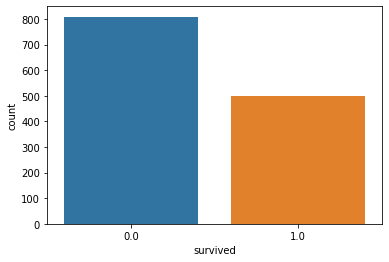

In [13]:
titanic2 = titanic.toPandas()

# 타이타닉 승객 성별 현황
sns.countplot(data=titanic2, x='survived')

<AxesSubplot:xlabel='JOB_ID', ylabel='count'>

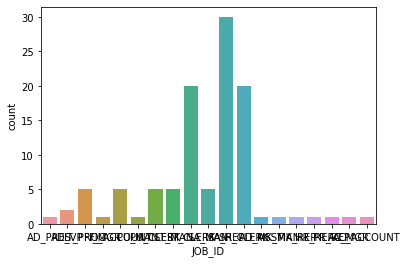

In [14]:
# 사원들의 직책별 현황
emp = spark.read.csv('csv/employees.csv', header=True, inferSchema=True)
emp2 = emp.toPandas()
sns.countplot(data=emp2, x='JOB_ID')